In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
pd.set_option('display.max_rows', 500)
y2015.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [5]:
import datetime

In [6]:
datetime.datetime.now()

datetime.datetime(2018, 8, 5, 21, 59, 51, 865861)

In [7]:
y2015['last_pymnt_d'] = pd.to_datetime(y2015['last_pymnt_d'])

In [8]:
y2015['time_elapsed'] = datetime.datetime.now() - y2015['last_pymnt_d']

In [9]:
y2015['time_elapsed'] = y2015['time_elapsed'].apply(lambda x: x.days)

In [10]:
y2015['last_credit_pull_d'] = pd.to_datetime(y2015['last_credit_pull_d'])

In [11]:
y2015['last_credit_pull_elapsed'] = datetime.datetime.now() - y2015['last_credit_pull_d']

In [12]:
y2015['last_credit_pull_elapsed'] = y2015['last_credit_pull_elapsed'].apply(lambda x: x.days)

In [13]:
y2015['next_pymnt_d'] = pd.to_datetime(y2015['next_pymnt_d'])

In [14]:
y2015['next_pymnt_elapsed'] = datetime.datetime.now() - y2015['next_pymnt_d']

In [15]:
y2015['next_pymnt_elapsed'] = y2015['next_pymnt_elapsed'].apply(lambda x: x.days)

In [16]:
y2015.drop(['last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d'], axis=1, inplace=True)

In [17]:
y2015['time_elapsed'] = pd.to_numeric(y2015['time_elapsed'])
y2015['last_credit_pull_elapsed']  = pd.to_numeric(y2015['last_credit_pull_elapsed'] )
y2015['next_pymnt_elapsed'] = pd.to_numeric(y2015['next_pymnt_elapsed'])

In [18]:
y2015.dtypes.value_counts()

float64    88
object     23
dtype: int64

In [19]:
categorical = y2015.select_dtypes(include=['object']).columns
for i in categorical:
    column = y2015[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
application_type
2
verification_status_joint
3


In [20]:
y2015.drop(['id', 'url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util', 'sub_grade', 'addr_state', 'desc' ],axis=1, inplace=True)

In [21]:
y2015.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,time_elapsed,last_credit_pull_elapsed,next_pymnt_elapsed
421092,38982739.0,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,5 years,RENT,...,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,826.0,612.0,NaN
421093,39222577.0,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,1 year,RENT,...,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,947.0,673.0,NaN
421094,38982659.0,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,10+ years,RENT,...,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,581.0,581.0,550.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
y2015 = y2015[:-2]

In [23]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
X = pd.get_dummies(X)
X = X.dropna(axis=1)
y = y2015['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
X_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
334333,47103338.0,3650.0,3650.0,3650.0,112.57,40000.0,11.82,1.0,0.0,7.0,...,0,0,0,0,1,1,0,0,0,0
193993,60303845.0,15000.0,15000.0,15000.0,457.97,95000.0,7.60,0.0,0.0,9.0,...,0,0,0,0,1,1,0,0,0,0
277101,52922398.0,16000.0,16000.0,16000.0,372.21,70000.0,20.88,0.0,2.0,12.0,...,0,0,0,0,1,1,0,0,0,0
241159,56650955.0,35000.0,35000.0,35000.0,802.29,92268.0,27.21,0.0,0.0,6.0,...,0,0,0,0,1,1,0,0,0,0
372714,44026021.0,18000.0,18000.0,18000.0,382.36,300000.0,3.71,0.0,0.0,9.0,...,0,0,0,0,1,1,0,0,0,0


In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.993282807379
0.960943251352


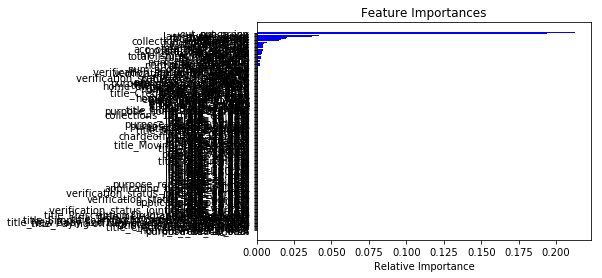

In [27]:
features = X.columns.values
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
importances_df = pd.DataFrame(importances)

In [29]:
importances_df['name'] = X.columns.values

In [30]:
importances_df.columns = ['importance', 'name']

In [31]:
importances_keep = importances_df[importances_df['importance'] > 0.01]

In [32]:
importances_keep.sort_values('importance')

,importance,name
3,0.014929,funded_amnt_inv
18,0.015252,total_rec_int
1,0.016273,loan_amnt
21,0.019492,collection_recovery_fee
4,0.019939,installment
20,0.020302,recoveries
16,0.037130,total_pymnt_inv
15,0.041828,total_pymnt
17,0.108530,total_rec_prncp
22,0.139269,last_pymnt_amnt


In [33]:
names = importances_keep['name'].values

In [34]:
rfc = ensemble.RandomForestClassifier()
X = X[names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.988638445411
0.961093652289


In [50]:
%%time
time1 = datetime.datetime.now()
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
time2 = datetime.datetime.now()

0.988784323837
0.961196558193
CPU times: user 18.5 s, sys: 563 ms, total: 19 s
Wall time: 23.6 s


In [48]:
(time1 - time2).seconds

86388

In [44]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()

In [45]:
time1 = datetime.datetime.now()
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))
time2 = datetime.datetime.now()

0.99446340487
0.942689327075


In [46]:
(time1 - time2).seconds

86393